# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
diamonds = pd.read_csv('diamonds_clean.csv')


In [89]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)

In [90]:
diamonds.head()

,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,5,1,61.5,55.0,326,3.95,0,30.75
1,2,0.21,Premium,5,2,59.8,61.0,326,3.89,0,29.90
2,3,0.23,Good,5,4,56.9,65.0,327,4.05,0,28.45
3,4,0.29,Premium,1,3,62.4,58.0,334,4.20,0,31.20
4,5,0.31,Good,0,1,63.3,58.0,335,4.34,0,31.65


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [91]:
#your code here
diamonds.describe()

,Unnamed: 0.1,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,26970.500000,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,0.073192,30.872477
std,15571.281097,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,0.388879,0.749681
min,1.000000,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,-1.000000,0.000000
25%,13485.750000,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,0.000000,30.500000
50%,26970.500000,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,0.000000,30.900000
75%,40455.250000,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,0.000000,31.250000
max,53940.000000,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,2.000000,36.800000


In [92]:
#your comments here
'''Price is the column with the highest standard deviation, so has values that vary a lot from
each other in each diamond.'''

'Price is the column with the highest standard deviation, so has values that vary a lot from\neach other in each diamond.'

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [93]:
#your hypotheses here
'''Price is affected by color(higher color, higher price)
Price is affected by clarity (higher clarity, higher price)
Price is affected by carat (higher carat, higher price)'''

'Price is affected by color(higher color, higher price)\nPrice is affected by clarity (higher clarity, higher price)\nPrice is affected by carat (higher carat, higher price)'

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [94]:
#your code here
diamonds1 = diamonds.pivot_table(index=["color"], values = ["carat", "clarity",'price'], aggfunc='mean')
diamonds1

,carat,clarity,price
color,,,
0,1.162137,2.776353,5323.818020
1,1.026927,2.964035,5091.874954
2,0.911799,2.933646,4486.669196
3,0.771190,3.463425,3999.135671
4,0.736538,3.133934,3724.886397
5,0.657867,2.969889,3076.752475
6,0.657795,2.691513,3169.954096


**What do you see? Pay special attention to the relationship between price and color.**

In [95]:
#your thoughts here
'''As the color is best, close to zero, the price increases.'''

'As the color is best, close to zero, the price increases.'

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

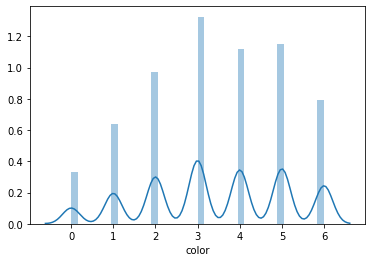

In [96]:
#your code here
sns.distplot(diamonds['color'])
plt.show()

In [97]:
#your comments here
'''The most frequent color is 3. The more rare color is 0. '''

'The most frequent color is 3. The more rare color is 0. '

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [98]:
#your code here
diamonds.groupby(['carat']).mean()

,Unnamed: 0.1,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.20,28965.166667,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,0.000000,30.550000
0.21,34659.000000,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,0.000000,30.255556
0.22,6948.600000,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,0.000000,30.810000
0.23,35756.993174,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,0.095563,30.713311
0.24,31885.330709,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,0.118110,30.799606
...,...,...,...,...,...,...,...,...,...
4.00,26445.000000,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,0.000000,31.650000
4.01,25999.500000,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,0.000000,30.875000
4.13,27131.000000,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,0.000000,32.400000


In [99]:
#your comments
'''As carat increases, price increases as well.'''

'As carat increases, price increases as well.'


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

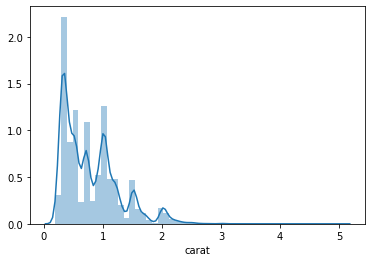

In [100]:
#your code here
sns.distplot(diamonds['carat'])

In [101]:
'''The diamonds that are more frequent are the ones between 0.2 and 0.3 carats.'''

'The diamonds that are more frequent are the ones between 0.2 and 0.3 carats.'

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [102]:
#your code here
diamonds.groupby(['table']).mean()

,Unnamed: 0.1,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,,
43.0,11369.00,1.0400,1.0,4.00,62.90,4997.0,6.450,0.0,31.450
44.0,35634.00,0.2900,5.0,4.00,62.80,474.0,4.200,0.0,31.400
49.0,14341.00,0.6500,3.0,3.00,64.25,2290.5,5.355,0.0,32.125
50.0,16299.50,1.5100,3.0,2.00,61.50,8995.5,7.380,1.0,30.750
50.1,3239.00,0.9400,2.0,1.00,66.00,3353.0,6.130,0.0,33.000
...,...,...,...,...,...,...,...,...,...
71.0,44939.00,0.6800,3.0,2.00,58.00,1633.0,5.850,0.0,29.000
73.0,51622.75,0.6025,4.5,3.25,68.90,2406.5,5.520,0.0,14.700
76.0,51343.00,0.7900,3.0,2.00,65.30,2362.0,5.520,0.0,32.650


In [103]:
#your comments here
'''We cannot draw proper conclusions by having table mean values.'''

'As table increases, the clarity does not seem to follow the same trend. In fact, clarity\ndoes not seem to be related with table at all. '

**Finally, do the same with the `clarity` column.**

In [104]:
#your code here
diamonds.groupby(['clarity']).mean()

,Unnamed: 0.1,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,,
0,22419.002699,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,0.052632,31.314372
1,21453.988580,1.077648,3.469980,61.772167,57.927181,5063.028606,6.401370,0.057320,30.885774
2,25585.839112,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,0.061538,30.926521
3,27831.973405,0.763935,3.494208,61.724417,57.417401,3924.989395,5.657709,0.076032,30.855679
4,27933.116510,0.727158,3.161792,61.667458,57.315151,3839.455391,5.572178,0.081263,30.833984
5,31323.464272,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,0.078366,30.831889
6,32402.172093,0.503321,3.351573,61.624651,56.884460,2523.114637,4.960364,0.107524,30.812261
7,33591.562011,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,0.107263,30.755307


In [ ]:
#your comments here
'''The best clarity a diamond has(zero) the higher the table and carat.'''

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [106]:
#your thoughts here
'''Carat and color are confirmed to affect the price of a diamond. However, clarity is not affecting the 
price in the same way. So my hipotheses was correct for the color and carat, but not for the clarity.''' 

'Carat and color are confirmed to affect the price of a diamond. However, clarity is not affecting the \nprice in the same way. So my hipotheses was correct for the color and carat, but not for the clarity.'

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


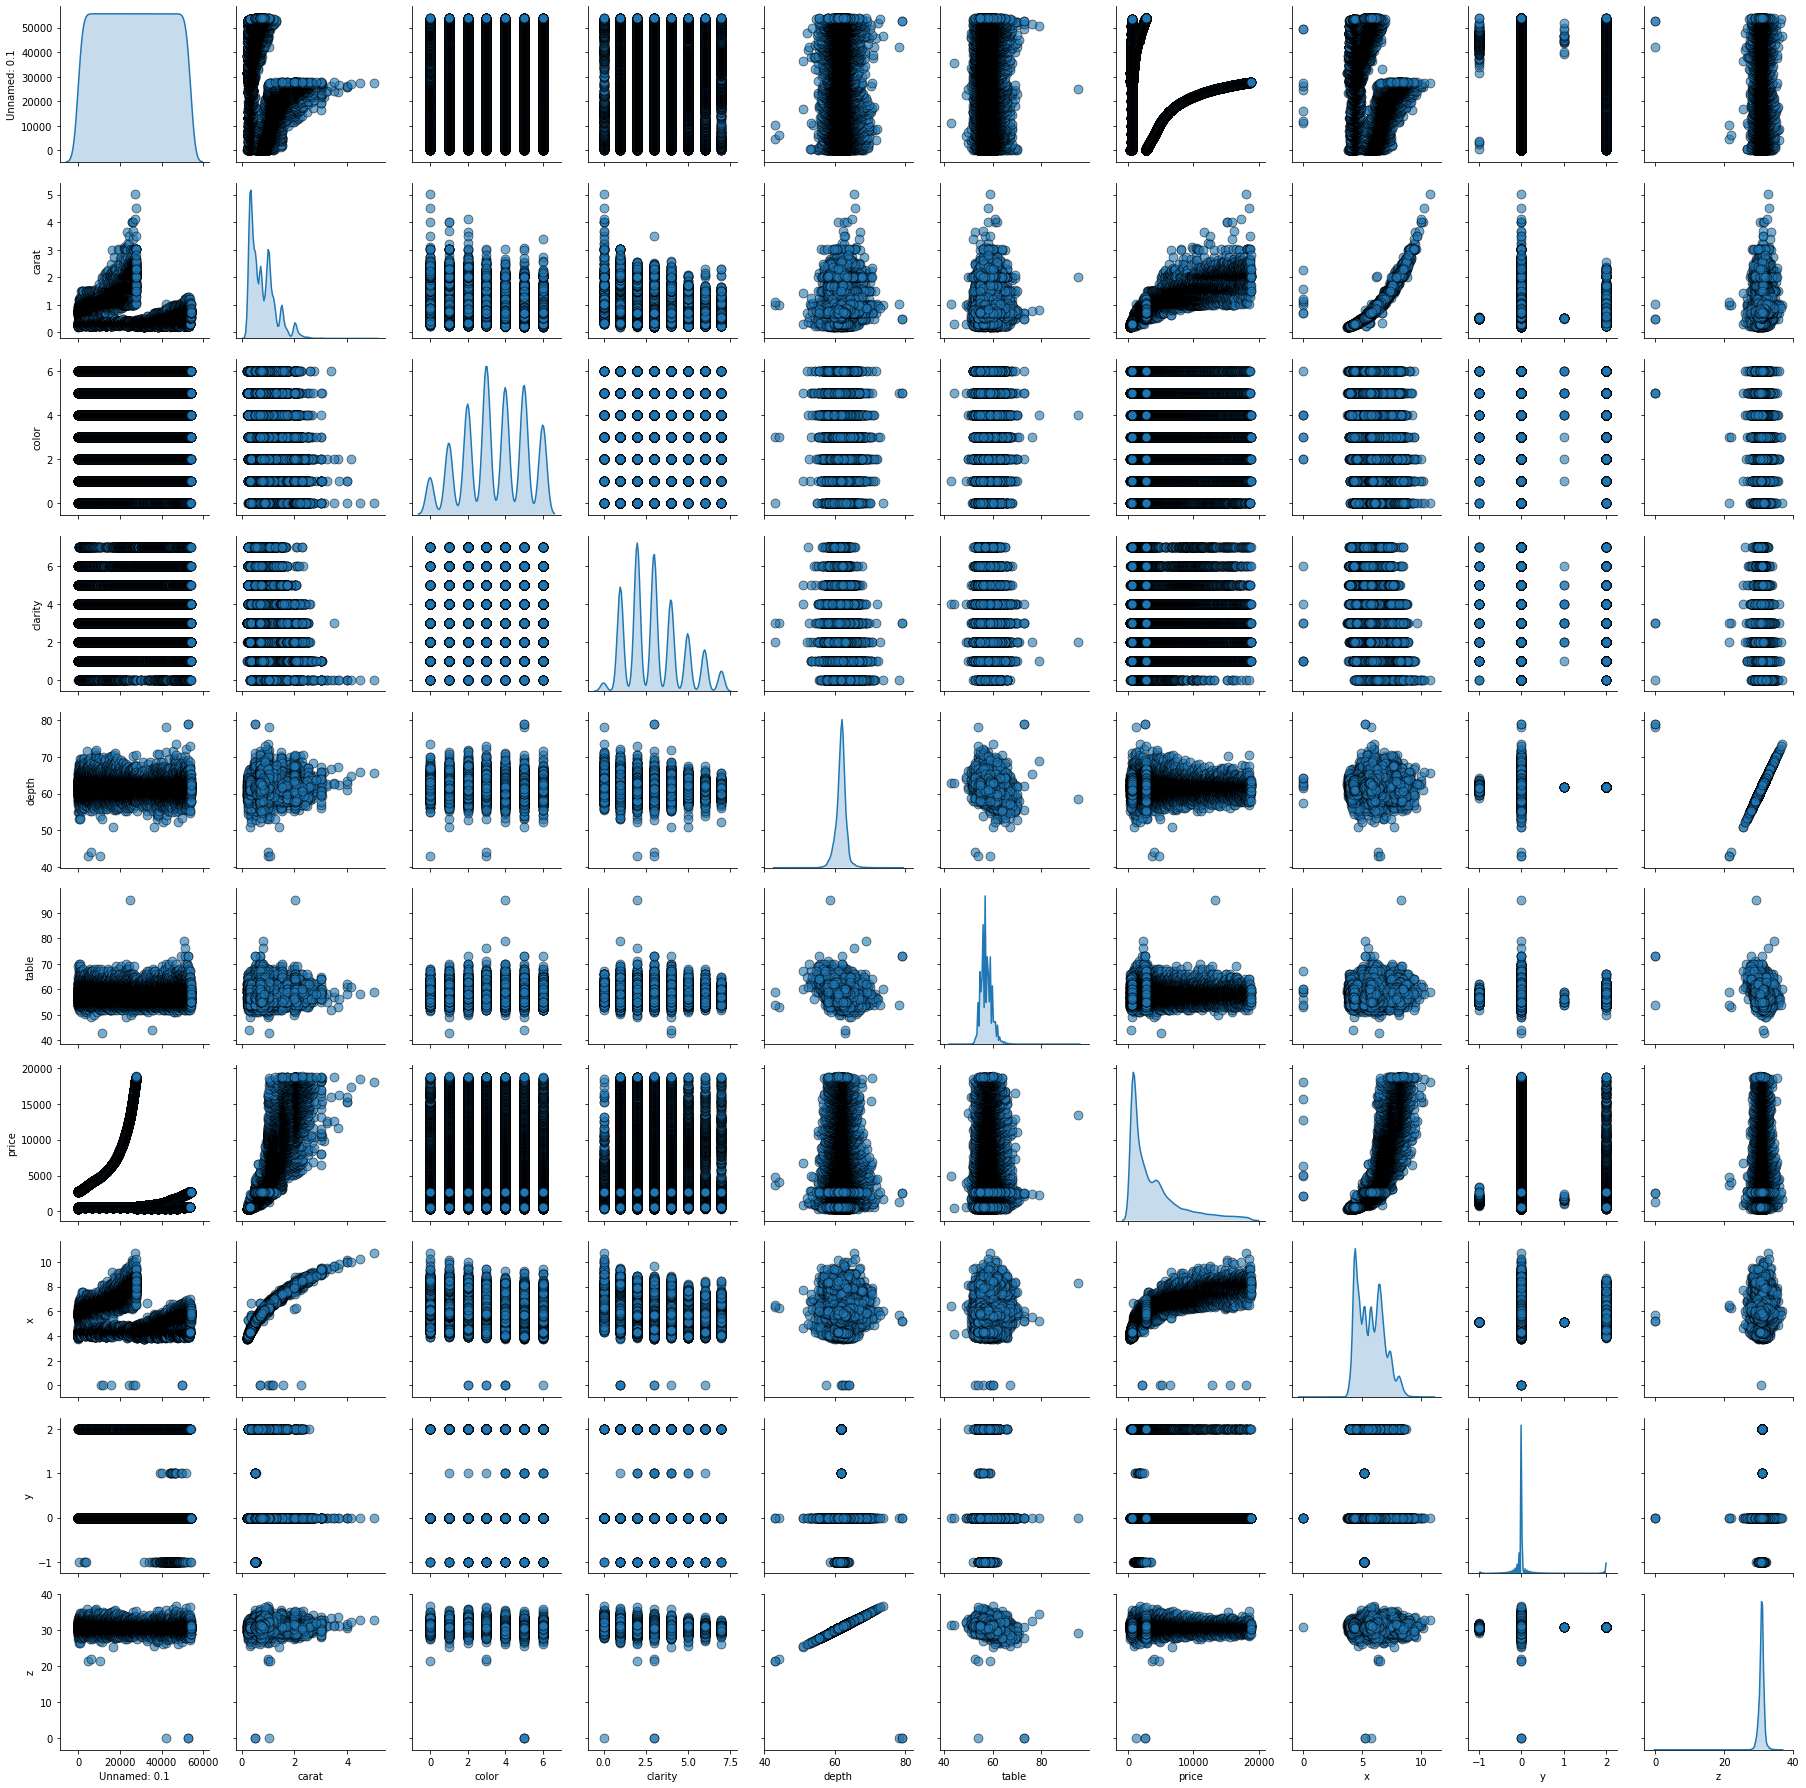

In [107]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
'''There are a lot of different graphs which make the analysis very difficult and inconclusive.'''

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

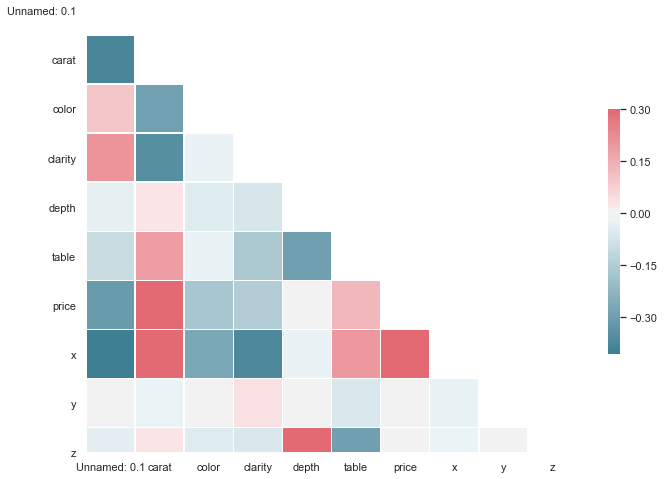

In [110]:
# your code here
sns.set(style="white")

# Compute the correlation matrix
corr = diamonds.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
'''I see that the features that are more correlated are:
carat - x
price - carat
depth - table
price - x
color - carat
price - unnamed'''

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

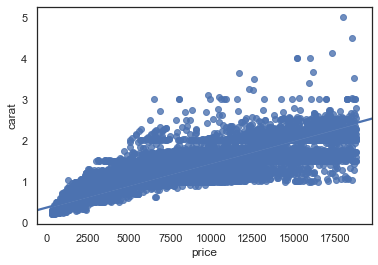

In [119]:
# your code here
from scipy import stats
g = sns.regplot(x="price", y="carat", data=diamonds)
plt.show()

In [128]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x = diamonds['price'], y = diamonds['carat'])
print(std_err, r_value)

1.985829466853465e-07 0.9215913011934792


**What do you think?**

In [ ]:
#your thoughts here
'''The error is very low, which means that there is a good relation between price and carat.
The fact that the r value is around 92% also indicates that price is highly affected by carat'''

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [129]:
#your thoughts here
'''Yes I would check clarity and color as well. The higher the carat, the higher the price.'''

'Yes I would check clarity and color as well. The higher the carat, the higher the price.'

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.